<a href="https://colab.research.google.com/github/pallavibhardwaj/BigMart-Data-Analysis-and-Prediction-Using-Sales-Data/blob/main/predictive_modelling_using_social_profile_on_online_p2p_lending_market.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#import warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv("prosperLoanData.csv")
df

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,258.0
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,41.0
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,158.0
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96713,2470358396439973405B8BF,849990,2013-07-24 13:37:33.353000000,NaN,36,Current,NaN,0.25781,0.2199,0.2099,...,-44.25,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
96714,24783602002975917F878CA,1199130,2014-02-07 13:18:36.557000000,NaN,36,Current,NaN,0.09434,0.0809,0.0709,...,0.00,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,247.0
96715,24843583885578464A837D4,836026,2013-07-11 11:11:39.723000000,NaN,60,Past Due (31-60 days),NaN,0.17522,0.1519,0.1419,...,-143.45,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
96716,2488357903016844697C07A,784347,2013-05-20 12:07:55.753000000,NaN,60,Current,NaN,0.25102,0.2259,0.2159,...,-72.71,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,146.0


In [4]:
# some summary statistics of prosperloanData
df.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,9.671800e+04,96718.000000,96700.000000,96718.000000,96718.000000,72042.000000,72042.000000,72042.000000,72042.000000,72042.000000,...,96717.000000,96717.000000,96717.000000,96717.000000,96717.000000,96717.000000,96717.000000,96717.000000,96717.000000,96717.000000
mean,6.282322e+05,40.846006,0.218597,0.192565,0.182503,0.168580,0.080214,0.095987,4.075817,5.952444,...,-54.810264,-14.136912,701.056499,682.212876,24.990728,0.998571,0.048151,0.023677,16.901568,80.477217
std,3.283448e+05,10.452112,0.080410,0.074836,0.074534,0.068492,0.046734,0.030361,1.673681,2.379463,...,60.770273,110.183462,2391.090574,2359.797305,274.152155,0.017946,0.334580,0.239244,302.987688,103.417453
min,6.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.012175e+05,36.000000,0.156290,0.133400,0.123900,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.220000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.011810e+05,36.000000,0.209330,0.183000,0.173000,0.161500,0.070000,0.091670,4.000000,6.000000,...,-34.540000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.938348e+05,36.000000,0.283700,0.250000,0.240000,0.224300,0.112000,0.116000,5.000000,8.000000,...,-13.980000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.004500,39.000000,33.000000,25000.000000,1189.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96718 entries, 0 to 96717
Data columns (total 81 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ListingKey                           96718 non-null  object 
 1   ListingNumber                        96718 non-null  int64  
 2   ListingCreationDate                  96718 non-null  object 
 3   CreditGrade                          24560 non-null  object 
 4   Term                                 96718 non-null  int64  
 5   LoanStatus                           96718 non-null  object 
 6   ClosedDate                           46713 non-null  object 
 7   BorrowerAPR                          96700 non-null  float64
 8   BorrowerRate                         96718 non-null  float64
 9   LenderYield                          96718 non-null  float64
 10  EstimatedEffectiveYield              72042 non-null  float64
 11  EstimatedLoss               

<Axes: >

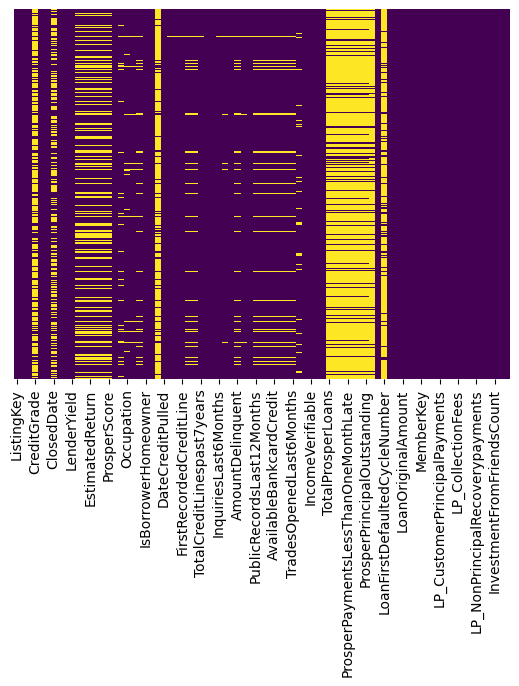

In [6]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<Axes: xlabel='count', ylabel='LoanStatus'>

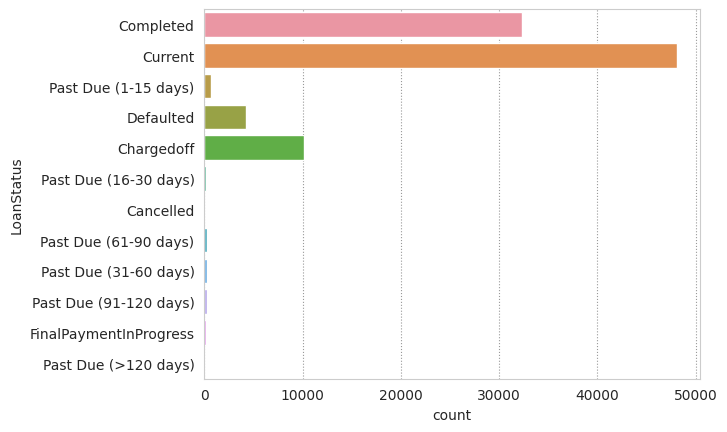

In [7]:
#Reading the histogram of the loanStatus
sns.set_style("whitegrid", {"grid.color": ".6", "grid.linestyle": ":"})
sns.countplot(y='LoanStatus',data=df)

<Axes: xlabel='count', ylabel='EmploymentStatus'>

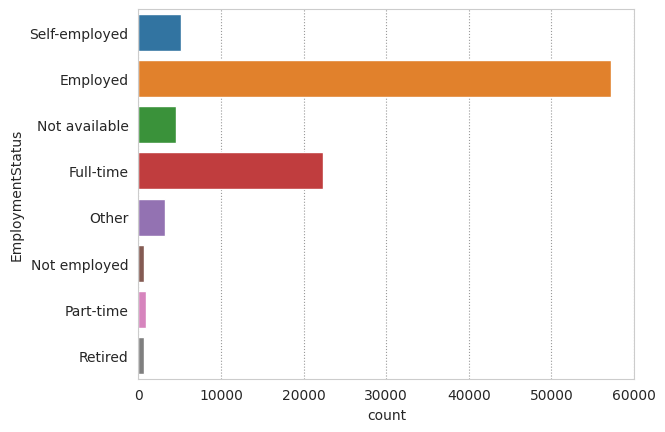

In [8]:
#Reading the histogram of the employeementStatus
sns.set_style("whitegrid", {"grid.color": ".6", "grid.linestyle": ":"})
sns.countplot(y='EmploymentStatus',data=df)

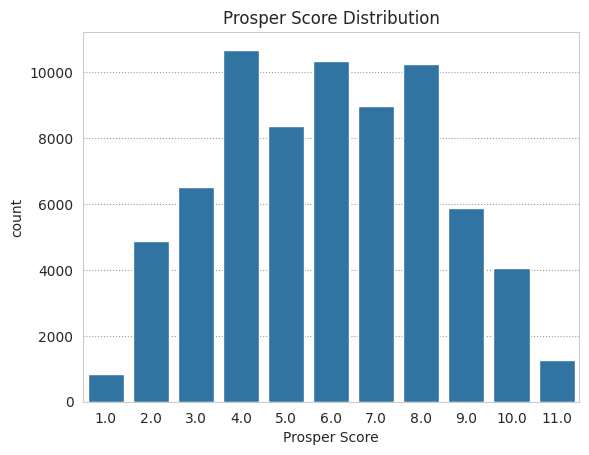

In [9]:
#Prosper Score Distribution
base_color = sns.color_palette()[0]
sns.countplot(data=df,x= 'ProsperScore',color=base_color)
plt.title('Prosper Score Distribution')
plt.xlabel('Prosper Score');

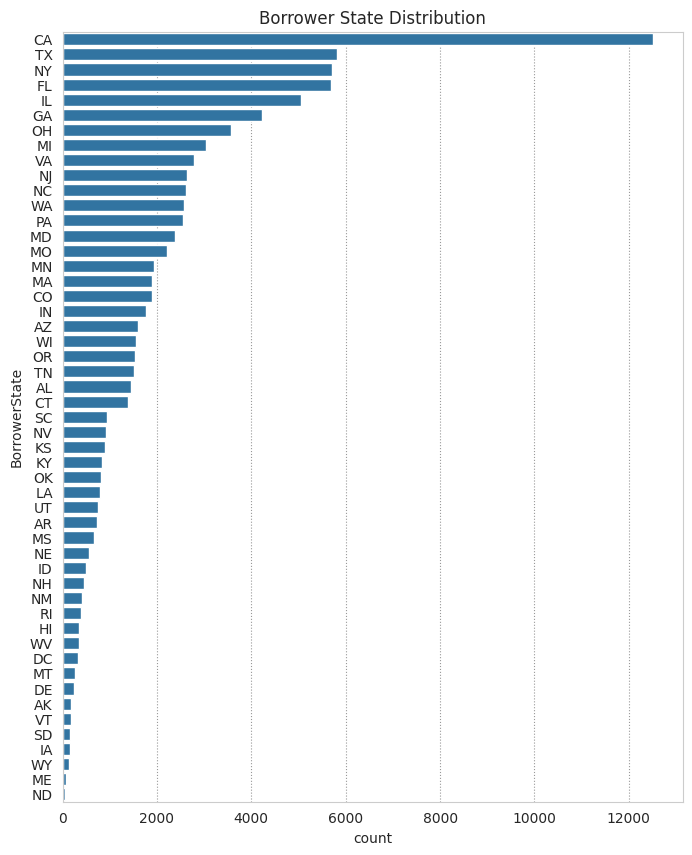

In [10]:
#Borrower State Distrobution
cat_order = df.BorrowerState.value_counts().index
plt.figure(figsize=[8, 10])
sns.countplot(data=df,y='BorrowerState',color=base_color, order=cat_order);
plt.title('Borrower State Distribution');

Most borrowers' occupations (excluding the others group) are: Professional, Computer Engineer and Executive. It is interesting to see that Students, Judges, Dentists and Biologists are the least occupations taking loans.

Text(0.5, 1.0, 'Borrower Occupation Distribution')

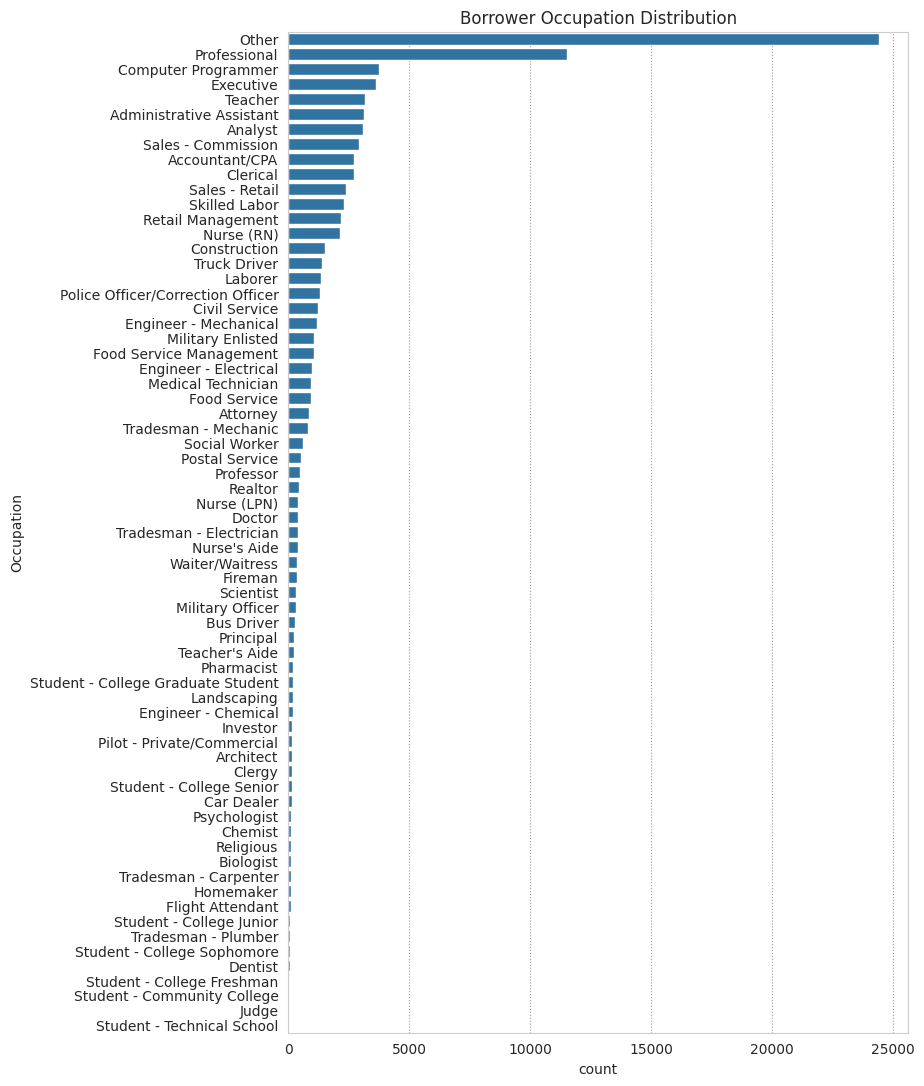

In [11]:
#Borrower Occupation Distrobution
cat_order = df.Occupation.value_counts().index
plt.figure(figsize=[8, 13])
sns.countplot(data=df,y='Occupation',color=base_color, order=cat_order);
plt.title('Borrower Occupation Distribution')

**cheking the prosper loan payment that has been delayed one month**

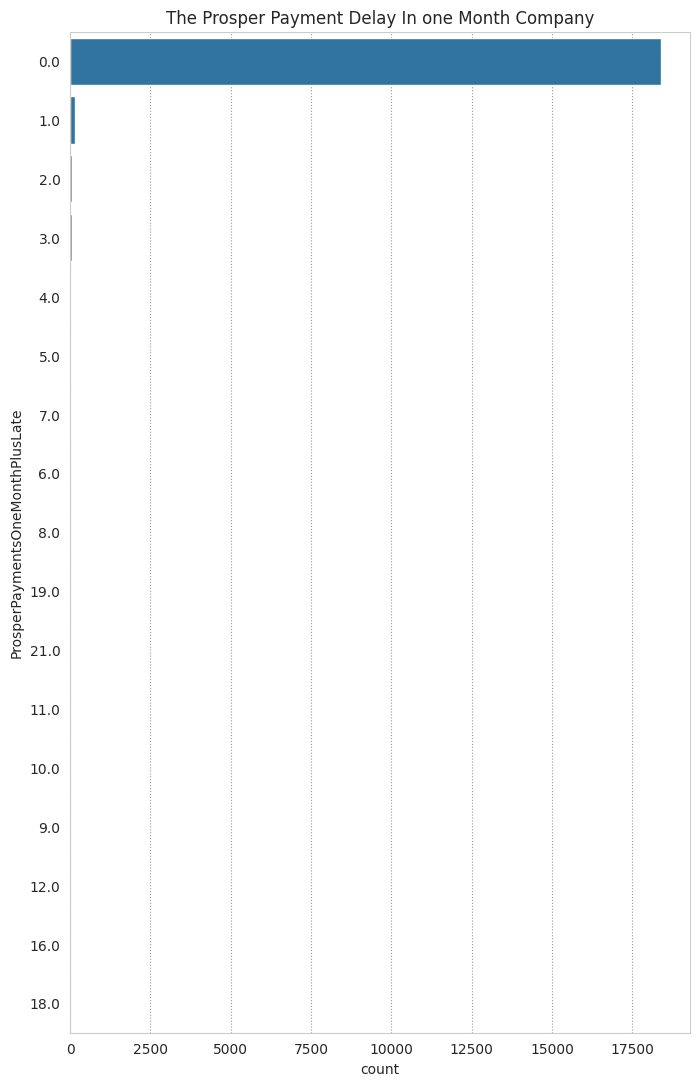

In [12]:
cat_order = df.ProsperPaymentsOneMonthPlusLate.value_counts().index
plt.figure(figsize=[8, 13])
sns.countplot(data=df,y='ProsperPaymentsOneMonthPlusLate',color=base_color, order=cat_order);
plt.title('The Prosper Payment Delay In one Month Company');

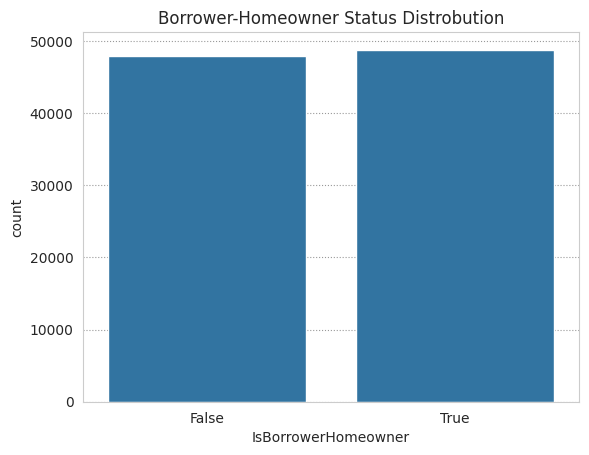

In [13]:
# #Is Borrower-Homeowner Status Distrobution
base_color = sns.color_palette()[0]
sns.countplot(data=df,x= 'IsBorrowerHomeowner',color=base_color);
plt.title('Borrower-Homeowner Status Distrobution')
plt.xlabel('IsBorrowerHomeowner');

**Borrower APR vs Status of Loan and Borrower APR vs Employment status**
On the left: Current and completed loans have lower rate than the past-due loans
On the right: Employed people have lower rates than not employed

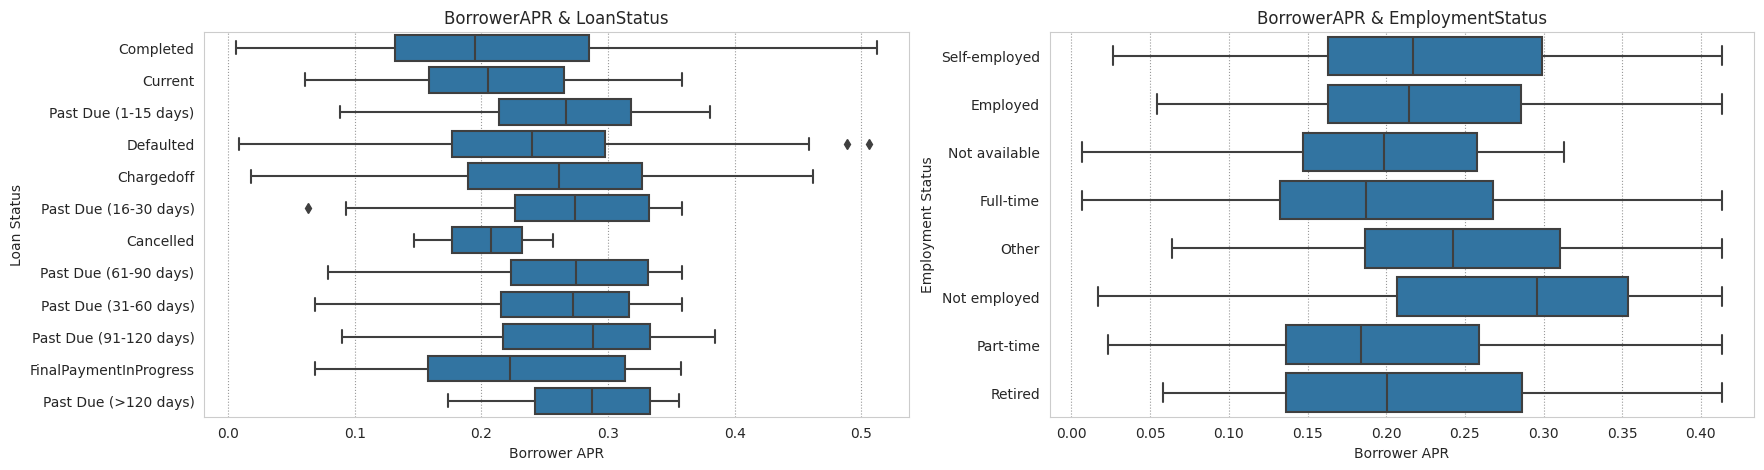

In [14]:
plt.figure(figsize = [20, 5])

plt.subplot(1, 2, 1)
sns.boxplot(data=df,x='BorrowerAPR',y='LoanStatus',color=base_color);
plt.xlabel('Borrower APR');
plt.ylabel('Loan Status');
plt.title('BorrowerAPR & LoanStatus');

plt.subplot(1, 2, 2)
sns.boxplot(data=df,x='BorrowerAPR',y='EmploymentStatus',color=base_color);
plt.xlabel('Borrower APR');
plt.ylabel('Employment Status');
plt.title('BorrowerAPR & EmploymentStatus');

Employed people can get larger loan amounts compared to all other categories.

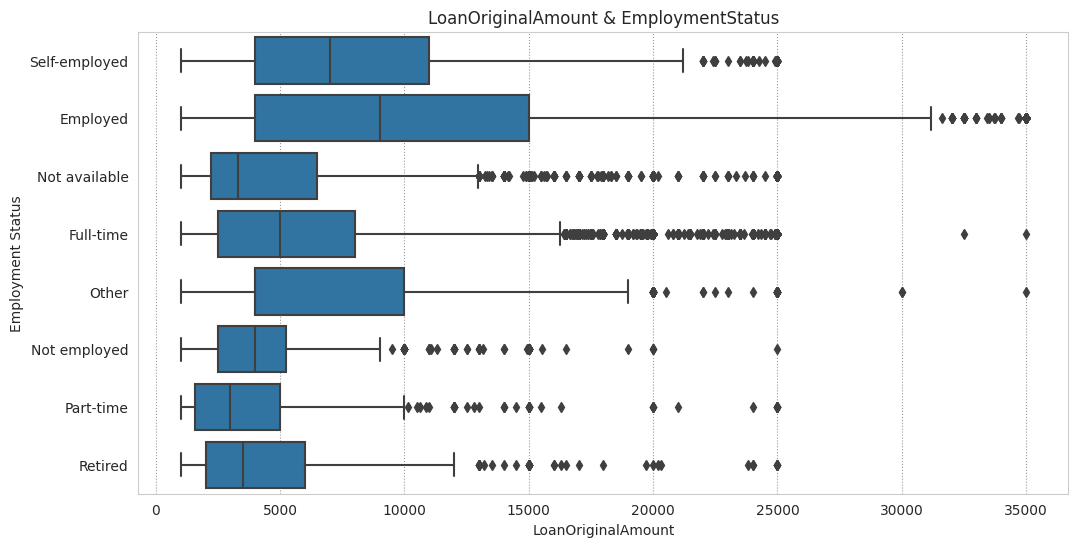

In [15]:
plt.figure(figsize = [12, 6])
sns.boxplot(data=df,x='LoanOriginalAmount',y='EmploymentStatus',color=base_color);
plt.xlabel('LoanOriginalAmount');
plt.ylabel('Employment Status');
plt.title('LoanOriginalAmount & EmploymentStatus');

In [16]:
df.shape

(96718, 81)

In [17]:
#displayinng the duplicates data into the loan data
df.duplicated().sum()

0

In [18]:
# Changing Loan orgination date into date time format
df['LoanOriginationDate'] = pd.to_datetime(df['LoanOriginationDate'])

In [19]:
# Changing Loan orgination date into date time format
df['ListingCreationDate'] = pd.to_datetime(df['ListingCreationDate'])

In [20]:
#check missing value
df.isnull().sum()

ListingKey                         0
ListingNumber                      0
ListingCreationDate                0
CreditGrade                    72158
Term                               0
                               ...  
PercentFunded                      1
Recommendations                    1
InvestmentFromFriendsCount         1
InvestmentFromFriendsAmount        1
Investors                          1
Length: 81, dtype: int64

In [21]:
df.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,9.671800e+04,96718.000000,96700.000000,96718.000000,96718.000000,72042.000000,72042.000000,72042.000000,72042.000000,72042.000000,...,96717.000000,96717.000000,96717.000000,96717.000000,96717.000000,96717.000000,96717.000000,96717.000000,96717.000000,96717.000000
mean,6.282322e+05,40.846006,0.218597,0.192565,0.182503,0.168580,0.080214,0.095987,4.075817,5.952444,...,-54.810264,-14.136912,701.056499,682.212876,24.990728,0.998571,0.048151,0.023677,16.901568,80.477217
std,3.283448e+05,10.452112,0.080410,0.074836,0.074534,0.068492,0.046734,0.030361,1.673681,2.379463,...,60.770273,110.183462,2391.090574,2359.797305,274.152155,0.017946,0.334580,0.239244,302.987688,103.417453
min,6.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.012175e+05,36.000000,0.156290,0.133400,0.123900,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.220000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.011810e+05,36.000000,0.209330,0.183000,0.173000,0.161500,0.070000,0.091670,4.000000,6.000000,...,-34.540000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.938348e+05,36.000000,0.283700,0.250000,0.240000,0.224300,0.112000,0.116000,5.000000,8.000000,...,-13.980000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.004500,39.000000,33.000000,25000.000000,1189.000000


<Axes: xlabel='BorrowerAPR', ylabel='Density'>

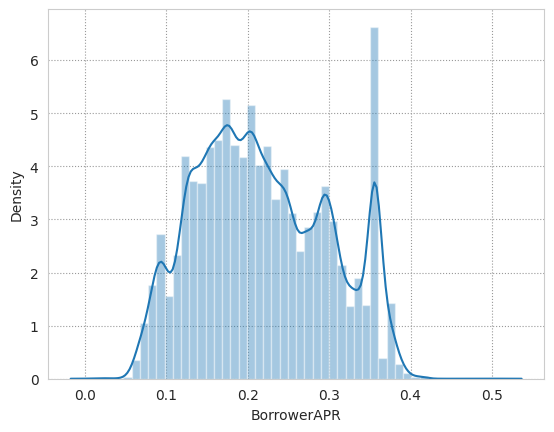

In [22]:
sns.distplot(df['BorrowerAPR'])

<Axes: xlabel='EmploymentStatusDuration', ylabel='Density'>

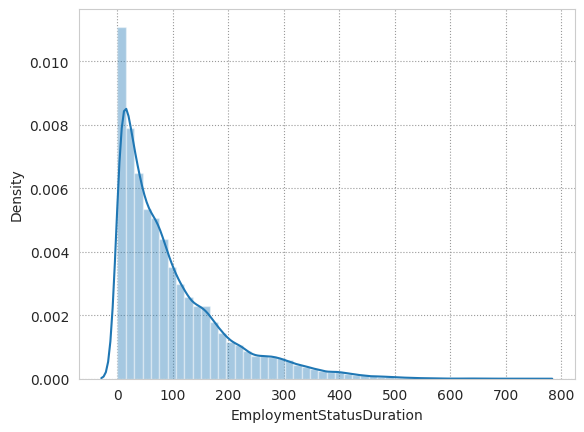

In [23]:
sns.distplot(df['EmploymentStatusDuration'])

<Axes: xlabel='ProsperScore', ylabel='Density'>

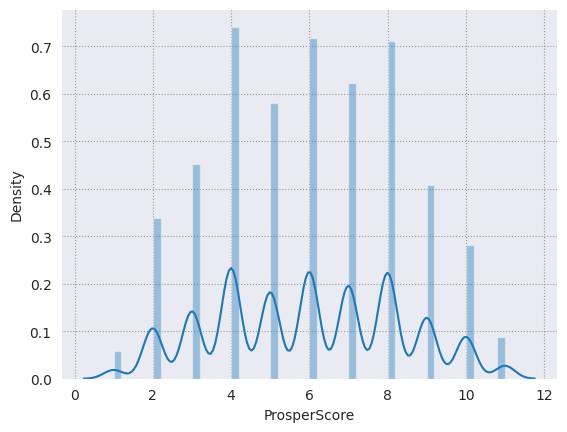

In [24]:
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
sns.distplot(df['ProsperScore'])


<Axes: ylabel='TotalProsperLoans'>

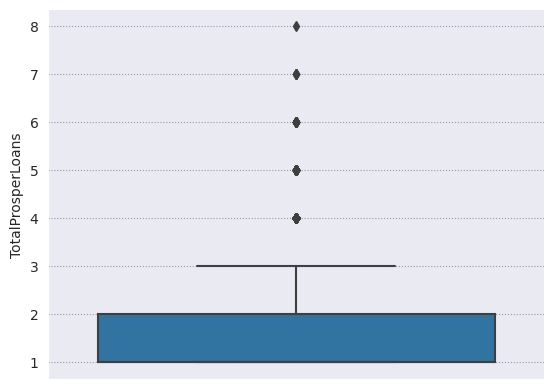

In [25]:
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
sns.boxplot(y='TotalProsperLoans',data=df)

In [26]:
#categorical data (There is no outlier detection for categorical data)
df['CreditGrade'].value_counts()

C     4748
D     4412
B     3736
AA    2990
HR    2940
A     2826
E     2798
NC     110
Name: CreditGrade, dtype: int64

In [28]:
df['LoanStatus'].value_counts()


Current                   48077
Completed                 32331
Chargedoff                10148
Defaulted                  4231
Past Due (1-15 days)        696
Past Due (31-60 days)       306
Past Due (61-90 days)       258
Past Due (91-120 days)      251
Past Due (16-30 days)       226
FinalPaymentInProgress      176
Past Due (>120 days)         15
Cancelled                     3
Name: LoanStatus, dtype: int64

In [29]:
df['Occupation'].value_counts()

Other                          24410
Professional                   11548
Computer Programmer             3763
Executive                       3649
Teacher                         3159
                               ...  
Dentist                           58
Student - College Freshman        39
Student - Community College       21
Judge                             17
Student - Technical School        15
Name: Occupation, Length: 67, dtype: int64

In [30]:
df['EmploymentStatus'].value_counts()

Employed         57192
Full-time        22335
Self-employed     5182
Not available     4571
Other             3235
Part-time          930
Not employed       686
Retired            682
Name: EmploymentStatus, dtype: int64

In [35]:
df['IncomeRange'].value_counts()


$25,000-49,999    27390
$50,000-74,999    26269
$100,000+         14725
$75,000-99,999    14350
Not displayed      6588
$1-24,999          6210
Not employed        661
$0                  524
Name: IncomeRange, dtype: int64

In [37]:
df_loan = df.copy()


In [38]:
### Dropping column
df_loan.drop(['ListingCreationDate','LoanOriginationDate','GroupKey','CreditGrade','ProsperPrincipalBorrowed','ProsperPrincipalOutstanding','EstimatedEffectiveYield','EstimatedLoss','EstimatedReturn','ProsperRating (numeric)',
        'TotalProsperLoans','TotalProsperPaymentsBilled','OnTimeProsperPayments','ProsperPaymentsLessThanOneMonthLate','ProsperPaymentsOneMonthPlusLate','ListingKey'], axis =1, inplace = True)
df_loan.head()

,ListingNumber,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,193129,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,NaN,NaN,0,...,-133.18,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,258.0
1,1209647,36,Current,NaN,0.12016,0.0920,0.0820,A,7.0,2,...,0.00,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,81716,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,NaN,NaN,0,...,-24.20,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,41.0
3,658116,36,Current,NaN,0.12528,0.0974,0.0874,A,9.0,16,...,-108.01,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,158.0
4,909464,36,Current,NaN,0.24614,0.2085,0.1985,D,4.0,2,...,-60.27,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,20.0


In [39]:
df_loan.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96718 entries, 0 to 96717
Data columns (total 65 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   ListingNumber                       96718 non-null  int64  
 1   Term                                96718 non-null  int64  
 2   LoanStatus                          96718 non-null  object 
 3   ClosedDate                          46713 non-null  object 
 4   BorrowerAPR                         96700 non-null  float64
 5   BorrowerRate                        96718 non-null  float64
 6   LenderYield                         96718 non-null  float64
 7   ProsperRating (Alpha)               72042 non-null  object 
 8   ProsperScore                        72042 non-null  float64
 9   ListingCategory (numeric)           96718 non-null  int64  
 10  BorrowerState                       92034 non-null  object 
 11  Occupation                          93699

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,258.0
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,41.0
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,158.0
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96713,2470358396439973405B8BF,849990,2013-07-24 13:37:33.353,NaN,36,Current,NaN,0.25781,0.2199,0.2099,...,-44.25,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
96714,24783602002975917F878CA,1199130,2014-02-07 13:18:36.557,NaN,36,Current,NaN,0.09434,0.0809,0.0709,...,0.00,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,247.0
96715,24843583885578464A837D4,836026,2013-07-11 11:11:39.723,NaN,60,Past Due (31-60 days),NaN,0.17522,0.1519,0.1419,...,-143.45,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
96716,2488357903016844697C07A,784347,2013-05-20 12:07:55.753,NaN,60,Current,NaN,0.25102,0.2259,0.2159,...,-72.71,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,146.0


In [40]:
# All are categorical data so we use mode concept
cols = ['ClosedDate','ProsperRating (Alpha)','BorrowerState','Occupation','EmploymentStatus','FirstRecordedCreditLine']


for i in cols:
    df_loan[i].fillna(df_loan[i].mode()[0], inplace=True)
    print(i)

ClosedDate
ProsperRating (Alpha)
BorrowerState
Occupation
EmploymentStatus
FirstRecordedCreditLine


Methods for dealing with missing values imputation

In [41]:
### All are numerical columns so we use mean concept.
cols =['BorrowerAPR','CreditScoreRangeLower','CreditScoreRangeUpper','ProsperScore','EmploymentStatusDuration','CurrentCreditLines','OpenCreditLines','TotalCreditLinespast7years','InquiriesLast6Months','TotalInquiries',
      'CurrentDelinquencies','AmountDelinquent','DelinquenciesLast7Years','PublicRecordsLast10Years','PublicRecordsLast12Months','RevolvingCreditBalance','BankcardUtilization','AvailableBankcardCredit','TotalTrades',
      'TradesNeverDelinquent (percentage)','TradesOpenedLast6Months','DebtToIncomeRatio','ScorexChangeAtTimeOfListing','LoanFirstDefaultedCycleNumber']


for i in cols:
    df_loan[i].fillna(df_loan[i].mean(), inplace=True)
    print(i)

BorrowerAPR
CreditScoreRangeLower
CreditScoreRangeUpper
ProsperScore
EmploymentStatusDuration
CurrentCreditLines
OpenCreditLines
TotalCreditLinespast7years
InquiriesLast6Months
TotalInquiries
CurrentDelinquencies
AmountDelinquent
DelinquenciesLast7Years
PublicRecordsLast10Years
PublicRecordsLast12Months
RevolvingCreditBalance
BankcardUtilization
AvailableBankcardCredit
TotalTrades
TradesNeverDelinquent (percentage)
TradesOpenedLast6Months
DebtToIncomeRatio
ScorexChangeAtTimeOfListing
LoanFirstDefaultedCycleNumber


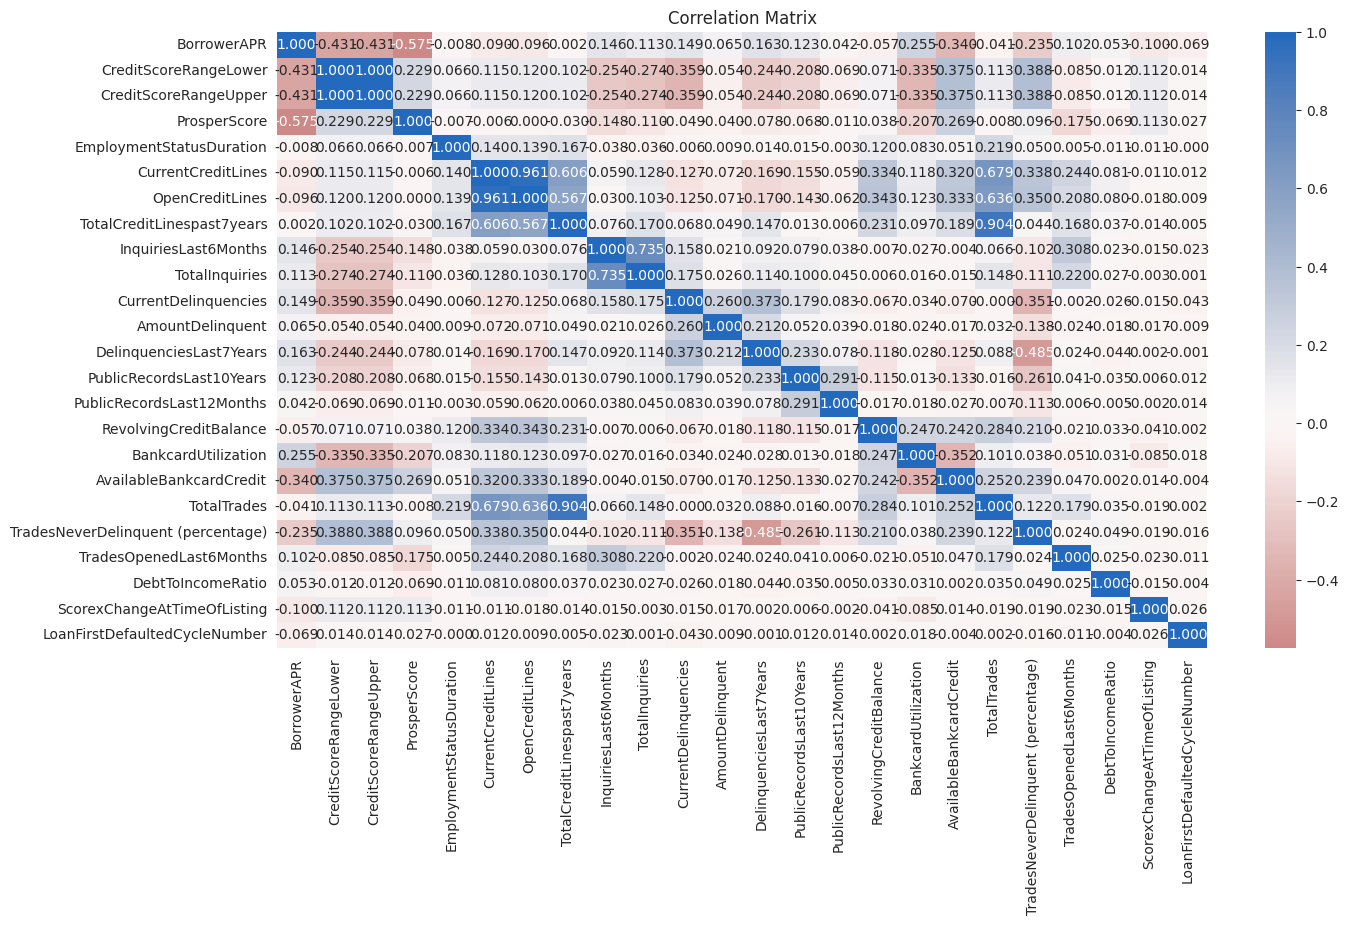

In [42]:
# Matrix of correlations for all numerical variables
plt.figure(figsize = [15, 8])
sns.heatmap(df_loan[cols].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.title('Correlation Matrix')
plt.margins(x = 0.5, y= 0.3)
plt.show()

In [43]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96718 entries, 0 to 96717
Data columns (total 65 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   ListingNumber                       96718 non-null  int64  
 1   Term                                96718 non-null  int64  
 2   LoanStatus                          96718 non-null  object 
 3   ClosedDate                          96718 non-null  object 
 4   BorrowerAPR                         96718 non-null  float64
 5   BorrowerRate                        96718 non-null  float64
 6   LenderYield                         96718 non-null  float64
 7   ProsperRating (Alpha)               96718 non-null  object 
 8   ProsperScore                        96718 non-null  float64
 9   ListingCategory (numeric)           96718 non-null  int64  
 10  BorrowerState                       96718 non-null  object 
 11  Occupation                          96718

Encoding the categorical columns

In [44]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cols = ['LoanStatus','ClosedDate','ProsperRating (Alpha)','BorrowerState','Occupation','EmploymentStatus','FirstRecordedCreditLine',
       'IsBorrowerHomeowner','CurrentlyInGroup','DateCreditPulled','IncomeRange','IncomeVerifiable','LoanKey','LoanOriginationQuarter',
       'MemberKey']

df_loan[cols] = df_loan[cols].apply(LabelEncoder().fit_transform)

In [45]:
df_loan.head()

,ListingNumber,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,193129,36,2,1119,0.16516,0.1580,0.1380,3,5.952444,0,...,-133.18,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,258.0
1,1209647,36,3,2776,0.12016,0.0920,0.0820,0,7.000000,2,...,0.00,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,81716,36,2,1244,0.28269,0.2750,0.2400,3,5.952444,0,...,-24.20,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,41.0
3,658116,36,3,2776,0.12528,0.0974,0.0874,0,9.000000,16,...,-108.01,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,158.0
4,909464,36,3,2776,0.24614,0.2085,0.1985,4,4.000000,2,...,-60.27,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,20.0


Feature Engineering

In [46]:
X = df_loan.drop(columns='LoanStatus', axis=1)
Y = df_loan['LoanStatus']

In [47]:
X

,ListingNumber,Term,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,193129,36,1119,0.16516,0.1580,0.1380,3,5.952444,0,5,...,-133.18,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,258.0
1,1209647,36,2776,0.12016,0.0920,0.0820,0,7.000000,2,5,...,0.00,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,81716,36,1244,0.28269,0.2750,0.2400,3,5.952444,0,10,...,-24.20,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,41.0
3,658116,36,2776,0.12528,0.0974,0.0874,0,9.000000,16,10,...,-108.01,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,158.0
4,909464,36,2776,0.24614,0.2085,0.1985,4,4.000000,2,23,...,-60.27,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96713,849990,36,2776,0.25781,0.2199,0.2099,4,5.000000,1,35,...,-44.25,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
96714,1199130,36,2776,0.09434,0.0809,0.0709,1,9.000000,1,4,...,0.00,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,247.0
96715,836026,60,2776,0.17522,0.1519,0.1419,2,8.000000,1,15,...,-143.45,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
96716,784347,60,2776,0.25102,0.2259,0.2159,3,8.000000,1,36,...,-72.71,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,146.0


In [48]:
Y

0        2
1        3
2        2
3        3
4        3
        ..
96713    3
96714    3
96715    8
96716    3
96717    1
Name: LoanStatus, Length: 96718, dtype: int64

Splitting the data into training data & Testing data



In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=100)

In [50]:
print(Y_train, X_train.shape, X_test.shape)

42250    2
60945    4
82668    3
35930    3
7574     2
        ..
65615    2
77655    2
79683    2
56088    3
38408    1
Name: LoanStatus, Length: 77374, dtype: int64 (77374, 64) (19344, 64)


In [51]:
X.shape


(96718, 64)

In [52]:
X_train.shape

(77374, 64)

In [ ]:
X_test.shape


**feature Selection**
Plotting the LP_CollectionFees and LP_ServiceFees columns in our dataset

Text(0.5, 1.0, 'LP_CollectionFees and LP_ServiceFees')

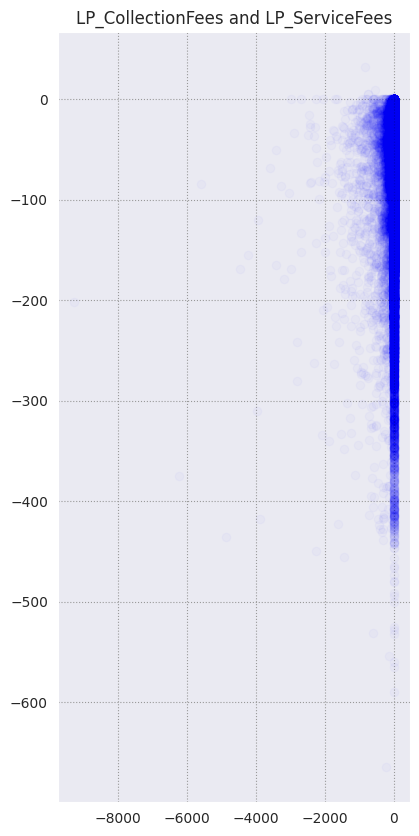

In [54]:
alpha = 0.02
plt.figure(figsize=(10,10))
# data = df

# LP_CollectionFees and LP_ServiceFees

plt.subplot(121)
plt.scatter(df.LP_CollectionFees, df.LP_ServiceFees, color='blue', alpha=alpha)
plt.title('LP_CollectionFees and LP_ServiceFees')

Text(0.5, 1.0, 'LP_CollectionFees and LP_ServiceFees')

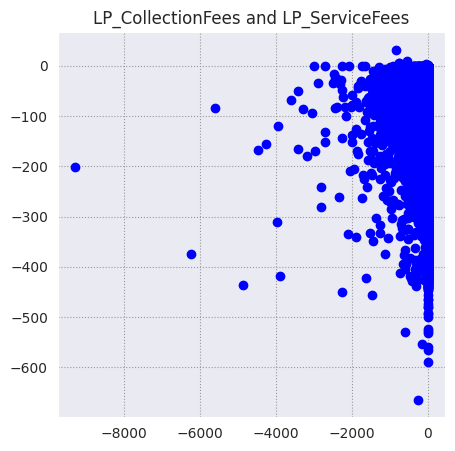

In [55]:
#the basically contain the same info
#Lets us see how LP_CollectionFees and LP_ServiceFees differ
plt.figure(figsize=(5,5))
plt.scatter(df.LP_CollectionFees,df.LP_ServiceFees, color='blue')
plt.title('LP_CollectionFees and LP_ServiceFees')

ONE HOT ENCODING

In [56]:
# import packages
import numpy as np
from sklearn.preprocessing import OneHotEncoder, LabelEncoder


# define example
data = np.array(['PercentFunded', 'PercentFunded', 'Investors', 'PercentFunded', '  LoanNumber', '  LoanNumber', 'Investors', 'PercentFunded', 'Investors', '  LoanNumber'])

# integer encode
label_encoder = LabelEncoder()

#fit and transform the data
integer_encoded = label_encoder.fit_transform(data)
print(integer_encoded)

# one-hot encode
onehot_encoder = OneHotEncoder(sparse=False)

#reshape the data
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)

#fit and transform the data
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)

print(onehot_encoded)

[2 2 1 2 0 0 1 2 1 0]
[[0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]]


In [57]:
from sklearn.model_selection import train_test_split

In [58]:
import pandas as pd
df = pd.read_csv('prosperLoanData.csv')
X_train, x_test, y_train, y_test, = train_test_split(df[['PercentFunded']],df.MonthlyLoanPayment,test_size=0.1)

In [59]:
X_train

,PercentFunded
30727,1.0
79671,1.0
18840,1.0
90137,1.0
72308,1.0
...,...
55513,1.0
49812,1.0
77422,1.0
43061,1.0


In [60]:
x_test

,PercentFunded
63389,1.0
37264,1.0
19337,1.0
68078,1.0
65433,1.0
...,...
4982,1.0
7784,1.0
23115,1.0
74326,1.0


In [61]:
y_train


30727    445.16
79671    109.45
18840    267.91
90137    501.01
72308    163.69
          ...  
55513    382.45
49812    123.92
77422    302.12
43061    233.31
84493    829.04
Name: MonthlyLoanPayment, Length: 87046, dtype: float64

In [62]:
y_test

63389    776.70
37264    659.57
19337    137.00
68078    366.51
65433    136.52
          ...  
4982      41.91
7784     182.04
23115    340.99
74326    126.24
67209     37.62
Name: MonthlyLoanPayment, Length: 9672, dtype: float64

In [63]:
# creating object of the class called model
from sklearn.linear_model import LogisticRegression

In [64]:
from sklearn import preprocessing
from sklearn import utils

#convert y values to categorical values
lab = preprocessing.LabelEncoder()
y_transformed = lab.fit_transform(y_train)

NameError: ignored